<a href="https://colab.research.google.com/github/hwangza125/-1/blob/projects/%ED%95%9C%EA%B5%AD%EC%9D%98_%EC%9D%8C%EC%A3%BC_%EB%8F%84%EC%88%98_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**국가별 음주 데이터 분석하기**

1. 탐색: 데이터의 기초 정보 확인

In [ ]:
#drinks 데이터셋 확인
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/DA/data/drinks.csv'
drinks=pd.read_csv(file_path)
print(drinks.info())
print(drinks.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None
             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4 

- country: 국가
- beer_servings: 맥주 소비량
- spirit_servings: 증류주 소비량
- wine_servings: 와인 소비량
- total_litres_of_pure_alcohol: 총 알코올 소비량
- continent: 국가의 대륙 정보
  - 총 193개의 데이터 존재
  - 국가와 대륙을 제외한 컬럼은 수치형
  - 대륙에는 23개의 결측값 존재

In [ ]:
#나머지 컬럼의 수치정보 확인
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


2. 인사이트 발견: 탐색과 시각화

- 수치형 컬럼들의 상관관계 분석
- 맥주와 와인 소비량의 상관 관계

In [ ]:
#두 컬럼 간 상관 계수
#pearson 상관계수
corr=drinks[['beer_servings','wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [ ]:
#수치형 컬럼들 간의 상관 계수 행렬
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


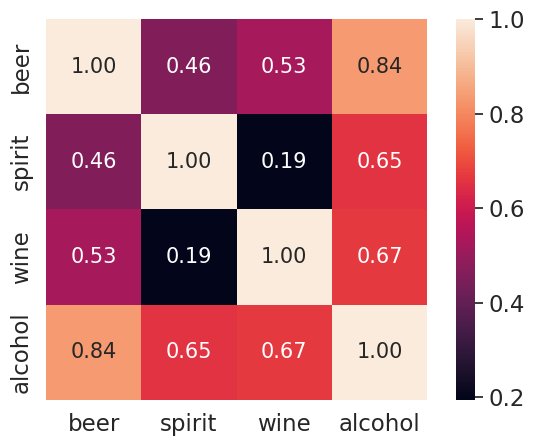

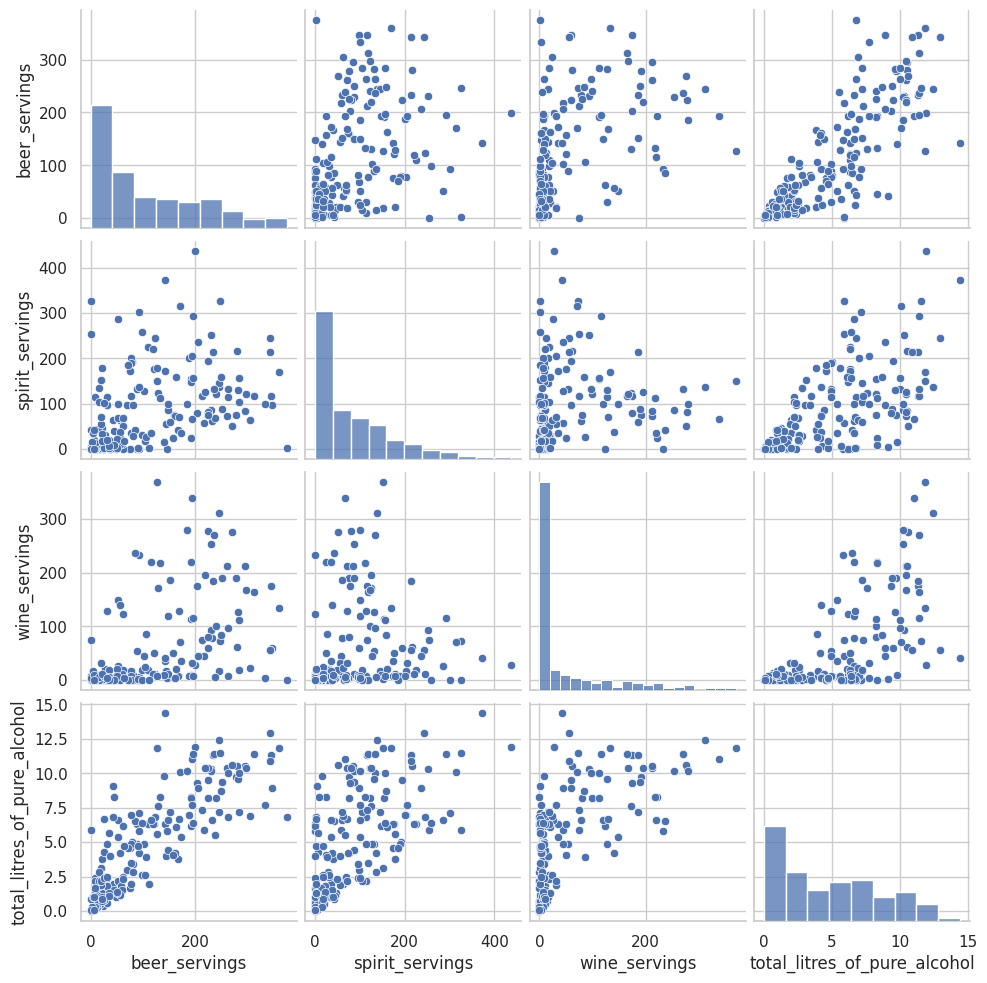

In [ ]:
#시각화를 위한 히트맵과 페어플롯 그래프
import seaborn as sns
import matplotlib.pyplot as plt

#corr 행렬 히트맵 시각화
cols_view=['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm=sns.heatmap(corr.values, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols_view, xticklabels=cols_view)
plt.tight_layout()
plt.show()

#시각화 라이브러리를 이용한 칼럼 간 산점도 그래프
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

- total_litres_of_pure_alcohol 칼럼이 대체적으로 모든 칼럼과 상관관계가 있는 것으로 보이며, 특히 beer_servings와의 상관성이 매우 높음

3. 탐색적 분석: 스무고개로 개념적 탐색 분석

- 대륙에 존재하는 결측 데이터 처리
- 정보가 존재하지 않는 국가를 'Others', 'OT'라는 대륙으로 재정의

In [ ]:
#결측 데이터 전처리
drinks['continent']=drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


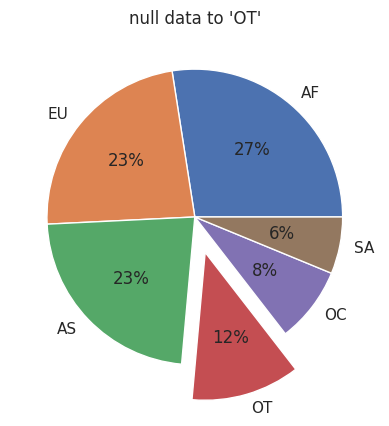

In [ ]:
#OT 비율을 파이차트로 시각화
labels=drinks['continent'].value_counts().index.tolist()
fracs1=drinks['continent'].value_counts().values.tolist()
explode=(0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=False)
plt.title('null data to \'OT\'')
plt.show()

In [ ]:
#대륙별 증류주 통계 정보
result=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
#평균 이상의 알코올을 섭취하는 대륙
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean>=total_mean]
continent_over_mean

,total_litres_of_pure_alcohol
continent,
EU,8.617778
OT,5.995652
SA,6.308333


In [ ]:
#평균 맥주 섭취량 1등 대륙
beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

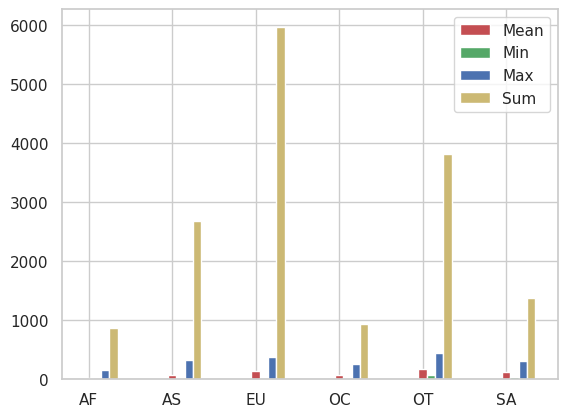

In [ ]:
#시각화
#증류주 통계 시각화
n_groups=len(result.index)
means=result['mean'].tolist()
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

index=np.arange(n_groups)
bar_width=0.1

rects1=plt.bar(index, means, bar_width, color='r',label='Mean')
rects2=plt.bar(index+bar_width, mins, bar_width, color='g', label='Min')
rects3=plt.bar(index+bar_width*2, maxs, bar_width, color='b', label='Max')
rects4=plt.bar(index+bar_width*3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

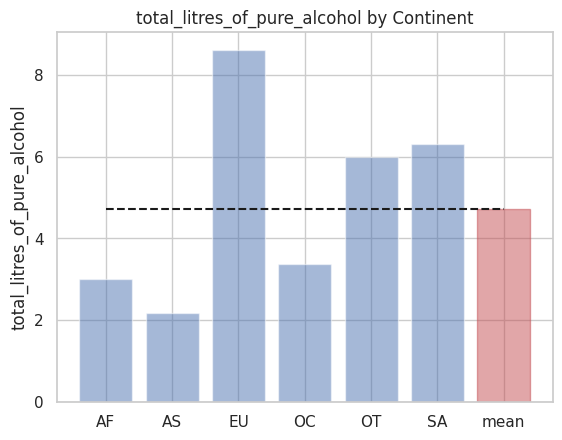

In [ ]:
#대륙별 총 알코올 소비량 시각화
continents=continent_mean.index.tolist()
continents.append('mean')
x=np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

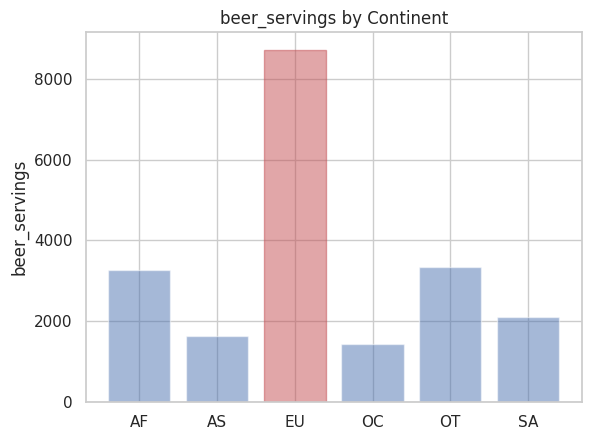

In [ ]:
#대륙별 맥주 소비량 시각화
beer_group=drinks.groupby('continent')['beer_servings'].sum()
continents=beer_group.index.tolist()
y=np.arange(len(continents))
alcohol=beer_group.tolist()

bar_list=plt.bar(y, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

4. 통계적 분석: 분석 대상 간의 통계적 차이 검정
- 분석 결과의 타당성을 부여하기 위해 통계적 차이 검정 수행
- 아프리카와 유럽 간 맥주 소비량 차이를 t-test(모집단의 평균)로 확인

In [ ]:
#아프리카와 유럽 간의 맥주 소비량 차이 검정
africa=drinks.loc[drinks['continent']=='AF']
europe=drinks.loc[drinks['continent']=='EU']
from scipy import stats
tTestResult=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


- t-test 검정 결과
  - p값이 0이므로 '두 집단의 평균이 같다'는 귀무 가설은 기각됨
  - 즉, '아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의미함
  - 결국 대립 가설인 '두 집단의 평균이 다르다'가 채택됨

- 대한민국은 얼마나 독하게 술을 마시는 나라일까?
  - 술의 총 소비량 활용

In [ ]:
#전체 소비량
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
#술 소비량 대비 알코올 비율 컬럼 생성
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)
#순위 부여
country_with_rank=drinks[['country','alcohol_rate']]
country_with_rank=country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


- 시각화

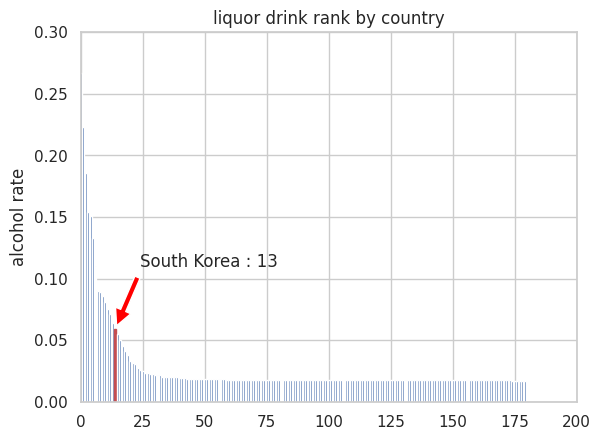

In [ ]:
country_list=country_with_rank.country.tolist()
x=np.arange(len(country_list))
rank=country_with_rank.alcohol_rate.tolist()

bar_list=plt.bar(x, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank=country_list.index("South Korea")
korea_alc_rate=country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
#한국을 표시하기 위한 주석 추가
plt.annotate('South Korea : ' + str(korea_rank - 1), xy=(korea_rank, korea_alc_rate), xytext=(korea_rank + 10, korea_alc_rate + 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

- 데이터 분석 결과

|문제정의|검증|인사이트|
|----|----|----|
|각 컬럼별 상관관계|모든 연속형 컬럼의 상관 분석|대부분 국가의 총 알코올 소비량은 맥주 소비량에 영향을 받을 확률이 높음. 대부분의 국가에서는 맥주가 가장 많이 소비되는 술이라는 해석도 가능|
|평균 맥주 소비량이 가장 높은 대륙|행을 그룹 단위로 분석|유럽이 가장 맥주 소비량이 높음. 단, 대륙별로 상이한 차이 존재|
|술 소비량 대비 알코올 비율 칼럼 생성|새로운 분석 칼럼 생성|술 소비량 대비 알코올 비율이라는 새로운 칼럼으로부터 술을 독하게 마시는 정도의 국가별 차이 확인 가능|
|아프리카와 유럽 간의 맥주 소비량 차이 검정|t-test 통계적 차이 검정|아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미한 차이 존재(단, 데이터 크키가 다르며 정규분포를 가정할 수 없기에 신뢰도는 낮은 정보)|

- 추가 분석
  - 대륙별 증류주 평균
  - 국가별 모든 술 소비량의 합 계산
  - 전체 평균보다 적은 알코올 마시는 대륙 중 와인을 가장 많이 마시는 국가는?
  - 술 소비량 대비 알코올 비율
  - 대륙별 술 소비량 대비 알코올 비율

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='/content/drive/MyDrive/DA/data/drinks.csv'
drinks=pd.read_csv(file_path)
drinks['continent']=drinks['continent'].fillna('OT')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
#대륙별 증류주 평균
continent_spirit=drinks.groupby('continent')['spirit_servings'].mean()
continent_spirit

,spirit_servings
continent,
AF,16.339623
AS,60.840909
EU,132.555556
OC,58.437500
OT,165.739130
SA,114.750000


In [ ]:
#국가별 모든 술 소비량의 합
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
country_total=drinks[['country','total_servings']]
country_total

,country,total_servings
0,Afghanistan,0
1,Albania,275
2,Algeria,39
3,Andorra,695
4,Angola,319
...,...,...
188,Venezuela,436
189,Vietnam,114
190,Yemen,6
191,Zambia,55


In [ ]:
#전체 평균보다 적은 알코올 마시는 대륙 중 와인을 가장 많이 마시는 국가

#전체 평균 알코올 소비량
total_mean=drinks['total_litres_of_pure_alcohol'].mean()
#대륙별 평균 알코올 소비량
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
#전체 평균보다 적게 마시는 대륙 목록
continent_under_mean=continent_mean[continent_mean<total_mean].index.tolist()
#해당 대륙에 속한 국가 중 와인 소비량이 가장 높은 국가
filtered=drinks[drinks['continent'].isin(continent_under_mean)]
wine_top=filtered.loc[filtered['wine_servings'].idxmax()]
wine_top['country']

'Equatorial Guinea'

In [ ]:
#술 소비량 대비 알코올 비율
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']
drinks['alcohol_rate']=drinks['total_servings']/drinks['total_litres_of_pure_alcohol']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,56.122449
2,Algeria,25,0,14,0.7,AF,39,55.714286
3,Andorra,245,138,312,12.4,EU,695,56.048387
4,Angola,217,57,45,5.9,AF,319,54.067797
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,56.623377
189,Vietnam,111,2,1,2.0,AS,114,57.000000
190,Yemen,6,0,0,0.1,AS,6,60.000000
191,Zambia,32,19,4,2.5,AF,55,22.000000


In [ ]:
#대륙별 술 소비량 대비 알코올 비율
continent_alcohol=drinks.groupby('continent')['alcohol_rate'].mean()
continent_alcohol

,alcohol_rate
continent,
AF,34.298836
AS,45.626049
EU,52.305058
OC,52.095192
OT,56.013001
SA,55.986168


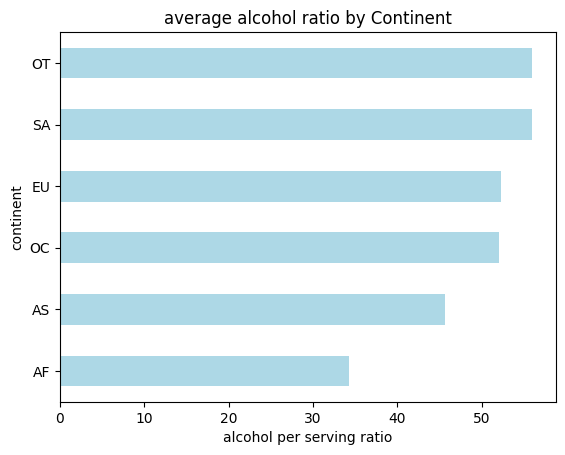

In [ ]:
#시각화
import matplotlib.pyplot as plt

continent_alcohol.sort_values().plot(kind='barh', color='lightblue')
plt.xlabel('alcohol per serving ratio')
plt.title('average alcohol ratio by Continent')
plt.show()